<a href="https://colab.research.google.com/github/ShobanaKamal/Machine-Learning-Projects/blob/master/Whatsapp_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import re
import pandas as pd
import numpy as np


watsup_file = 'IT DEPT Official.txt'



if os.path.exists(watsup_file):
        file_data = open(watsup_file,'r', encoding="utf8")
        watsup_content = file_data.read()


date_regex=re.compile(r'(\d+/\d+/\d+)')
date=date_regex.findall(watsup_content)


time_regex=re.compile(r'(\d{1,2}:\d{2} AM|PM)')
time=time_regex.findall(watsup_content)


user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(watsup_content)


message_regex=re.compile(r'([^:]+):?$')
me_regex=re.compile(r"(\n)(?<=)(\d+/\d+/\d+)(.*)")
mess=me_regex.findall(watsup_content)
message = [''.join(message_regex.findall(''.join(msg))).strip() for msg in mess]


data=[]
for w,x,y,z in zip(date,time,user,message):
    data.append([str(w),str(x),str(y),str(z)])
    

df=pd.DataFrame(data,columns=("Date","Time","User","Message"))


df['Message']=df['Message'].str.replace('\'(.*?): ','')


df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year


df['Month']=df['Date'].dt.month


df['Day']=df['Date'].dt.day


df['Words'] = df['Message'].str.strip().str.split('[\W_]+')


df['Word Length'] = df['Words'].apply(len)-2


df['Message Characters'] = df['Message'].map(str).apply(len)-3


df['Media']=df['Message'].str.contains('<Media omitted>')


df.to_csv("whatsapp.csv")

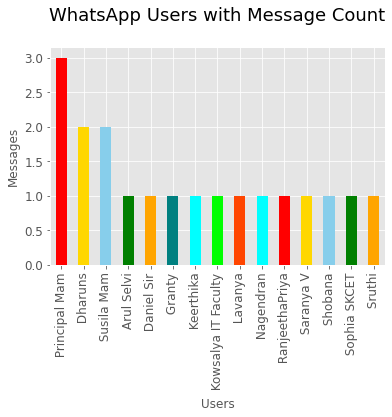

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
 
users=df.groupby('User')['User'].count().nlargest(15)
 
def bar_chart(users):
    ax = users.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("WhatsApp Users with Message Count\n", fontsize=18)
    ax.set_xlabel("Users", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.show()
    #plt.savefig('whatsapp.png')
 
bar_chart(users)

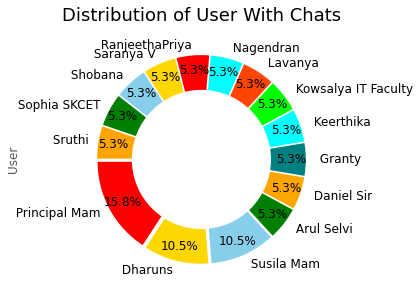

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('User')['User'].count().nlargest(15)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)

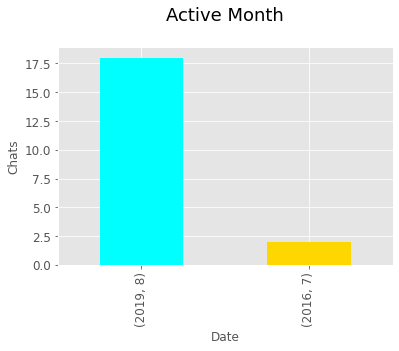

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_month=df.groupby(['Year','Month'])['Month'].count().nlargest(15)

def active_month_bar_chart(active_month):
    ax = active_month.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

active_month_bar_chart(active_month)